# Simple Pump Example Script
This script shows basic I/O operations that can be performed with this toolkit, and gives a very brief overview into basic fault modelling.

This script runs these basic operations on the simple model defined in pump_script.py.

In [2]:
#First, import the fault propogation library as well as the model
#since the package is in a parallel location to examples...
import sys
sys.path.append('../')

import fmdkit.faultprop as fp
import fmdkit.resultproc as rp
from ex_pump import *
from IPython.display import HTML
mdl = Pump()

### Initial Model Checks
Before seeing how faults propogate, it's useful to see how the model performs
in the nominal state to check to see that the model has been defined correctly.
Some things worth checking:
   - are all functions on the graph?
   - are the functions connected with the correct flows?
   - do any faults occur in the nominal state?
   - do all the flow states proceed as desired over time?

The following code runs the model with no faults to let us do that. The inputs are:
    - mdl (the model we imported at the start of the script)
    - track (whether or not we would like to track the flows)

The outputs are:
    - endresults (a dictionary of the degraded flows, resulting faults, and fault classification at final t)
    - resgraph (the results superimposed on the graph at final t)
    - mdlhist (the states of the functions and flows over time)


In [3]:
endresults, resgraph, mdlhist=fp.run_nominal(mdl, track=True)

With these results, we can now plot the graph of results resgraph using:

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


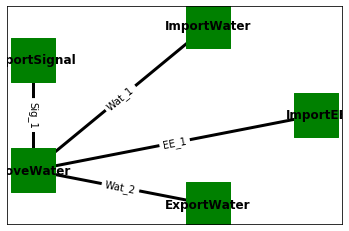

In [4]:
rp.show_graph(resgraph)

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *green*, no faults were accidentally introduced in this run.

We can further look at the state of the model using:

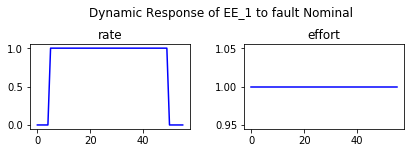

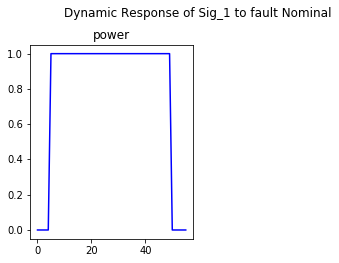

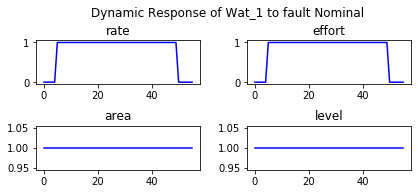

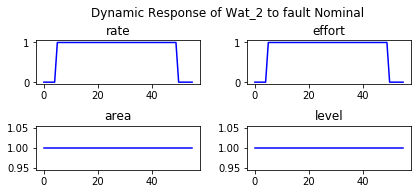

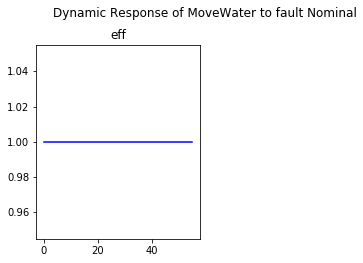

In [5]:
rp.plot_mdlhist(mdlhist, 'Nominal')

As we can see, the state of these flows does exactly what we would expect--when the switch turns on at $t=5$, the pump switches on and there is a flow of water in and out of the model.

### Tables
If we want to see this data in tabular form, we can use `fp.make_histtable()`:

In [37]:
nominal_histtable = rp.make_histtable(mdlhist)
nominal_histtable[:10] #only displaying 10 

time MoveWater EE_1        Sig_1 Wat_1                   Wat_2              \
     t       eff rate effort power  rate effort area level  rate effort area   
0    0       1.0  0.0    1.0   0.0   0.0    0.0  1.0   1.0   0.0    0.0  1.0   
1    1       1.0  0.0    1.0   0.0   0.0    0.0  1.0   1.0   0.0    0.0  1.0   
2    2       1.0  0.0    1.0   0.0   0.0    0.0  1.0   1.0   0.0    0.0  1.0   
3    3       1.0  0.0    1.0   0.0   0.0    0.0  1.0   1.0   0.0    0.0  1.0   
4    4       1.0  0.0    1.0   0.0   0.0    0.0  1.0   1.0   0.0    0.0  1.0   
5    5       1.0  1.0    1.0   1.0   1.0    1.0  1.0   1.0   1.0    1.0  1.0   
6    6       1.0  1.0    1.0   1.0   1.0    1.0  1.0   1.0   1.0    1.0  1.0   
7    7       1.0  1.0    1.0   1.0   1.0    1.0  1.0   1.0   1.0    1.0  1.0   
8    8       1.0  1.0    1.0   1.0   1.0    1.0  1.0   1.0   1.0    1.0  1.0   
9    9       1.0  1.0    1.0   1.0   1.0    1.0  1.0   1.0   1.0    1.0  1.0   

         
  level  
0   1.0  
1   1.0  
2   1.0  
3   1.0  
4   1.0  
5   1.0  
6   1.0  
7   1.0  
8   1.0  
9   1.0

This table is a pandas dataframe. We can save this dataframe to a .csv using `nominal_histtable.to_csv("filename.csv")`

### Propagating and Viewing Results for Individual Faults
It is often necessary to see how the system reacts to individual faults. This can gives us better understanding of how the system behaves under individual faults and can let us iterate with the model better.

The following code runs the model with a single fault in a single function. In this case, we are initiating a short in the 'Move Water' function at 10 seconds into the system's operation.

The inputs are:
    - mdl (the model we imported at the start of the script)
    - Function (the function the fault we're interested in propagating occurs in)
    - faultmode (the fault to initiate)
    - time (the time when the fault is initiated)
    - track (whether or not we want to track flows)

The outputs are (the same as ffermat.runnominal):
    - endresults (a dictionary of the degraged flows, resulting faults, and fault classification at final t)
    - resgraph (the results superimposed on the graph at final t)
    - mdlhist (the states of the model over time)

In [38]:
endresults, resgraph, mdlhist=fp.run_one_fault(mdl, 'MoveWater', 'short', time=10)

`rp.compare_hist(mdlhist)` compares the results over time so we can see what functions and flows were degraded over time. We can then use the summary to view a list of the functions and flows that were impacted over time.

In [39]:
reshist,diff, summary = rp.compare_hist(mdlhist)
#summarytable = fp.makesummarytable(summary)
tab = rp.make_resulttable(endresults, summary)
tab

,rate,cost,expected cost,degraded functions,degraded flows
0,1.000000e-07,20000.0,200.0,"[ImportEE, MoveWater]","[EE_1, Wat_1, Wat_2]"


We can also see what happens with the graph view:

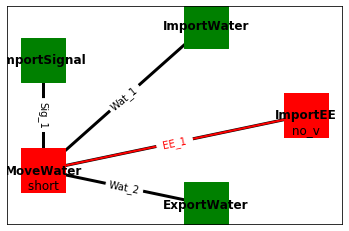

In [40]:
rp.show_graph(resgraph)

As can be seen, at the final t, the short causes a degraded flow of electricity as well as a fault in the Import EE function. 

However, we would imagine that the short would cause the water to stop moving also--so why is it green?

The answer is that the results graph gives the values of the variables at the final time, which is the same both for the failed model and the nominal model, since the pump is switched "off." In this case we might be more interested in looking at how the graph looks in operation, rather than at the end. We can do that that by constructing graphs based on the history of the plot. Below we use `reshist` to plot the state of the graph at a particular time.

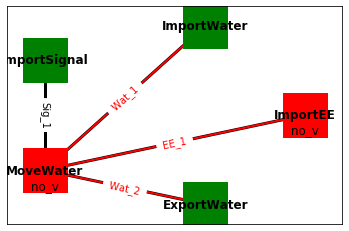

0

In [41]:
rp.plot_resultsgraph_from(mdl, reshist, 20, gtype = 'normal')

We can view an animation over time using:

In [42]:
#%matplotlib notebook
#ani = rp.animate_resultsgraphs_from(mdl, reshist, 'all', faultscen='MoveWater Short (10)', gtype='normal')
#HTML(ani.to_jshtml())
#saving plot (if desired--.gif does not seem to work)
#ani.save('test.mp4')

Bipartite representations of the graphs can also be made, see:

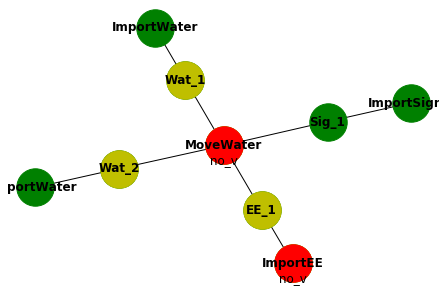

0

In [43]:
pos=nx.spring_layout(mdl.bipartite) #(use this option to keep node locations consistent)
rp.plot_resultsgraph_from(mdl, reshist, 20, gtype = 'bipartite', scale=2, pos=pos)

We can also plot the states of this against the nominal run using:

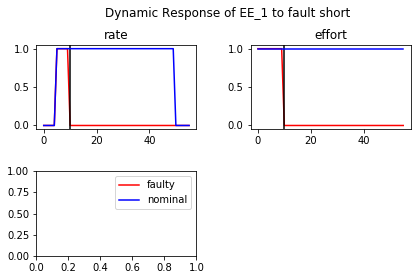

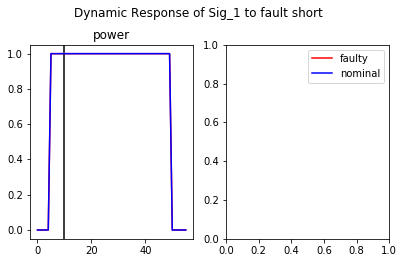

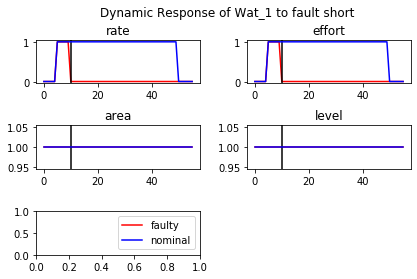

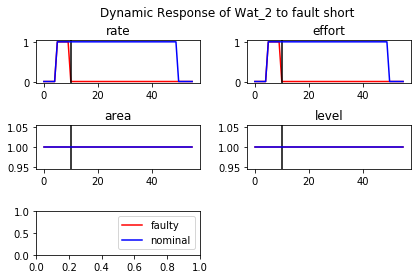

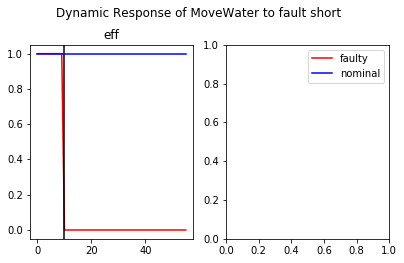

In [44]:
rp.plot_mdlhist(mdlhist, 'short', time=10)

As you can see, the system begins nominal until the fault is injected at $t=10$. At this moment, not only are the electrical energy flows degraded, the flow of water is degraded also. However, at $t=55$ when the system is supposed to be turned off, this flow of water is no longer "degraded" because it is in the same state as the nominal system.

We can look at a table of to see more precisely what happened (and export, if needed). Note that we need to give the plotting function the mode ('short') and the time for it to plot properly.

Here we can see that the short dropped the voltage to zero, (this was because an open circuit resulted in the Import EE function), causing the water to stop flowing. Below, we use the processed model history to show the faults and *degradation* of states over time. In this case, 1 means nominal while 0 means degraded.

In [45]:
short_histtable = rp.make_histtable(reshist)
short_histtable

time     ImportEE                               ImportWater            \
      t       faults numfaults status       faults      faults numfaults   
0     0        {nom}         0      1        {nom}       {nom}         0   
1     1        {nom}         0      1        {nom}       {nom}         0   
2     2        {nom}         0      1        {nom}       {nom}         0   
3     3        {nom}         0      1        {nom}       {nom}         0   
4     4        {nom}         0      1        {nom}       {nom}         0   
5     5        {nom}         0      1        {nom}       {nom}         0   
6     6        {nom}         0      1        {nom}       {nom}         0   
7     7        {nom}         0      1        {nom}       {nom}         0   
8     8        {nom}         0      1        {nom}       {nom}         0   
9     9        {nom}         0      1        {nom}       {nom}         0   
10   10  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
11   11  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
12   12  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
13   13  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
14   14  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
15   15  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
16   16  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
17   17  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
18   18  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
19   19  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
20   20  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
21   21  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
22   22  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
23   23  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
24   24  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
25   25  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
26   26  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
27   27  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
28   28  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
29   29  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
30   30  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
31   31  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
32   32  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
33   33  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
34   34  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
35   35  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
36   36  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
37   37  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
38   38  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
39   39  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
40   40  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
41   41  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
42   42  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
43   43  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
44   44  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
45   45  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
46   46  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
47   47  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
48   48  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
49   49  {no_v, nom}         1      0  {no_v, nom}       {nom}         0   
50   50  {no_v, nom}         1      0  {no_v, nom} 

If we want a simpler view of just the degraded faults and flows (rather than the specific faults, etc), we can use:

In [46]:
short_deghisttable = rp.make_deghisttable(reshist)
short_deghisttable[1:20]

,time,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater,EE_1,Sig_1,Wat_1,Wat_2
1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1,1,1
5,5,1,1,1,1,1,1,1,1,1
6,6,1,1,1,1,1,1,1,1,1
7,7,1,1,1,1,1,1,1,1,1
8,8,1,1,1,1,1,1,1,1,1
9,9,1,1,1,1,1,1,1,1,1
10,10,0,1,1,0,1,0,1,0,0


We can also look at statistics of degradation over time using:

In [47]:
short_statstable = rp.make_statstable(reshist)
short_statstable[:20]

,time,degraded flows,degraded functions,total faults
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
5,5,0,0,0
6,6,0,0,0
7,7,0,0,0
8,8,0,0,0
9,9,0,0,0


We can also look at other faults. The results below are for a blockage of the pipe. In this case we're only interested in the effect on the water going through, so only those flows are tracked.

In [48]:
endresults2, resgraph2, mdlhist2=fp.run_one_fault(mdl, 'ExportWater', 'block', time=10)
reshist2,diff2, summary2 = rp.compare_hist(mdlhist2)
restab2 = rp.make_resulttable(endresults2, summary2)
restab2

,rate,cost,expected cost,degraded functions,degraded flows
0,0.00001,20000.0,20000.0,"[MoveWater, ExportWater]","[EE_1, Wat_1, Wat_2]"


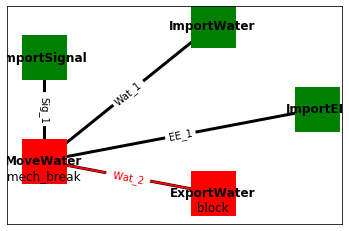

In [50]:
rp.show_graph(resgraph2)

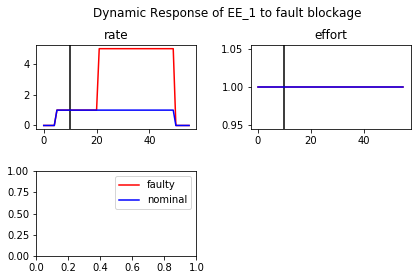

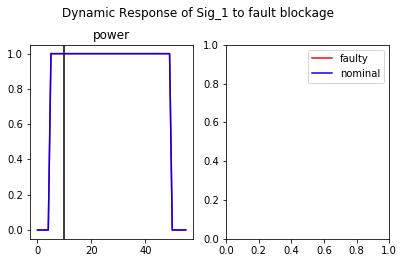

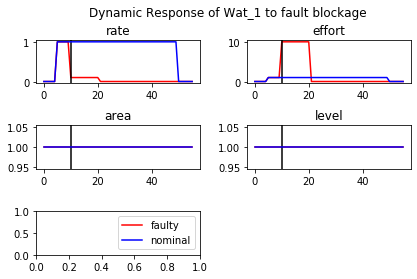

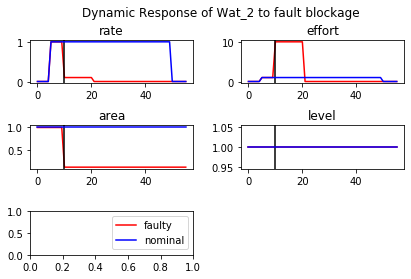

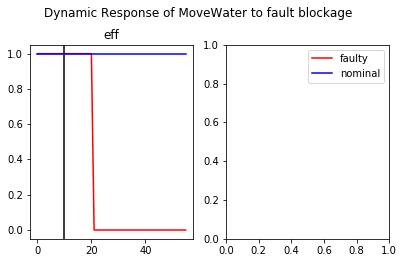

In [51]:
rp.plot_mdlhist(mdlhist2, 'blockage', time=10)

### Visualization of resilience metrics
We can use the processed time history to now make visualizations of the resilience of the system over time. Below we use the "makeheatmaps" function, which calculates the following metrics of interest:
- "degtime," the percentage of the time the function/flow of the system was degraded
- "maxdeg," the number of flow values that were degraded at a given time
- "intdeg," the number of flow values that were degraded at a given time * the time degraded
- "maxfaults," the maximum number of faults in each function at any given time
- "maxdiff," the max distance between states of functions/flows and the nominal
- "intdiff," the distance between states of functions/flows and the nominal * the time off-nominal

In [52]:
heatmaps = rp.make_heatmaps(reshist2, diff2)
heatmapstable = rp.make_heatmapstable(heatmaps)
heatmapstable

,EE_1,ExportWater,ImportEE,ImportSignal,ImportWater,MoveWater,Sig_1,Wat_1,Wat_2
degtime,0.517857,0.821429,0.0,0.0,0.0,0.625000,0.0,0.714286,0.821429
maxdeg,2.000000,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,4.000000
intdeg,1.482143,NaN,NaN,NaN,NaN,NaN,1.0,2.571429,1.750000
maxfaults,NaN,1.000000,0.0,0.0,0.0,1.000000,NaN,NaN,NaN
intdiff,-1.035714,NaN,NaN,NaN,NaN,0.625000,0.0,-0.138839,0.045982
maxdiff,0.000000,NaN,NaN,NaN,NaN,0.017857,0.0,0.008929,0.012946


Note: not all of these maps will display values for all functions and flows, as shown by the NaN's in the table. I'll use "degtime" to illustrate.

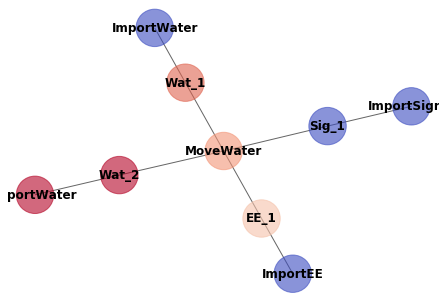

In [54]:
rp.show_bipartite(mdl.bipartite, heatmap=heatmaps['degtime'], scale=2, pos=pos)

These maps can also be plotted on the graph view, where only those for funcions will be shown. Here the maximum number of faults is plotted.

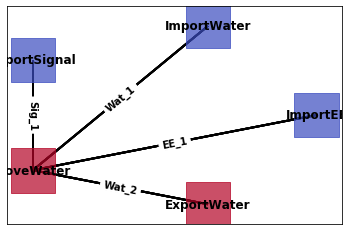

In [55]:
rp.show_graph(mdl.graph, heatmap=heatmaps['maxfaults'])

### Running a List of Faults
Finally, to get the results of all of the single-fault scenarios defined in the model, we can run them all at once using the `proplist()` function. Note that this will propagate faults based on the times vector put in the model, e.g. if times=[0,3,15,55], it will propogate the faults at the begining, end, and at t=15 and t=15. This function only takes in the model mdl and outputs two similar kinds of output--resultsdict (the results in a python dicitonary) and resultstab (the results in a nice tabular form). See below:

In [56]:
endclasses, mdlhists=fp.run_list(mdl, staged=True)
simplefmea = rp.make_simplefmea(endclasses)
simplefmea[:5]

,cost,expected cost,rate
"ImportEE no_v, t=0",10000.0,10000.0,1.000000e-05
"ImportEE inf_v, t=0",10000.0,100.0,1.000000e-07
"ImportWater no_wat, t=0",10000.0,10000.0,1.000000e-05
"ImportSignal no_sig, t=0",10000.0,10000.0,1.000000e-05
"MoveWater mech_break, t=0",10000.0,10000.0,1.000000e-05


To process these results, use `rp.comparehists(mdlhists)`, which will calculate the degradation of the system over time in the model for all scenarios.

In [57]:
reshists, diffs, summaries = rp.compare_hists(mdlhists)
fullfmea = rp.make_fullfmea(endclasses, summaries)
fullfmea[:10]

,degraded flows,degraded functions,cost,expected cost,rate
"ImportEE no_v, t=0",[EE_1],[ImportEE],10000,10000,1e-05
"ImportEE inf_v, t=0",[],[ImportEE],10000,100,1e-07
"ImportWater no_wat, t=0","[Wat_1, Wat_2]",[ImportWater],10000,10000,1e-05
"ImportSignal no_sig, t=0","[EE_1, Sig_1, Wat_1, Wat_2]",[ImportSignal],10000,10000,1e-05
"MoveWater mech_break, t=0","[EE_1, Wat_1, Wat_2]",[MoveWater],10000,10000,1e-05
"MoveWater short, t=0","[EE_1, Wat_1, Wat_2]","[ImportEE, MoveWater]",20000,200,1e-07
"ExportWater block, t=0","[EE_1, Wat_1, Wat_2]","[MoveWater, ExportWater]",20000,20000,1e-05
"ImportEE no_v, t=20",[EE_1],[ImportEE],10000,10000,1e-05
"ImportEE inf_v, t=20",[],[ImportEE],10000,100,1e-07
"ImportWater no_wat, t=20","[Wat_1, Wat_2]",[ImportWater],10000,10000,1e-05


Now that these results have been processed, we can use them to visualize the expected resilience of the model to the fault scenarios. Here we will use the average percentage of time degraded

In [58]:
heatmap1 = rp.make_avgdegtimeheatmap(reshists)
rp.make_dicttable(heatmap1)

,EE_1,ExportWater,ImportEE,ImportSignal,ImportWater,MoveWater,Sig_1,Wat_1,Wat_2
0,0.32568,0.079082,0.232143,0.079082,0.079082,0.213435,0.063776,0.334184,0.334184


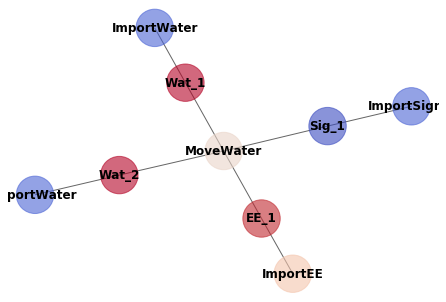

In [59]:
rp.show_bipartite(mdl.bipartite, heatmap=heatmap1, scale=2, pos=pos)

Using this table (and the visualization) we would conclude that in our set of fault scenarios the Wat_1, Wat_2, and EE_1 flows degrade as often as each other. However, this does not tell us which flows are most likely to be degraded based on our simulations. In order to determine that, rate information must be used to get the *expected* degradation of each node.

In [60]:
heatmap2 = rp.make_expdegtimeheatmap(reshists, endclasses)
rp.make_dicttable(heatmap2)

,EE_1,ExportWater,ImportEE,ImportSignal,ImportWater,MoveWater,Sig_1,Wat_1,Wat_2
0,0.000003,7.908163e-07,8.061224e-07,7.908163e-07,7.908163e-07,0.000001,6.377551e-07,0.000003,0.000003


The results here are roughly the same, though. The expected degradation of the EE_1 flow is less here than the Wat_1 and Wat_2 flows. 

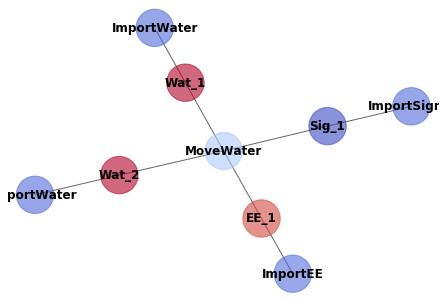

In [61]:
rp.show_bipartite(mdl.bipartite, heatmap=heatmap2, scale=2, pos=pos)

We can do the same looking at the maximum number of faults occuring in each scenario. 

In [62]:
heatmap3= rp.make_faultsheatmap(reshists)
rp.make_dicttable(heatmap3)

,ExportWater,ImportEE,ImportSignal,ImportWater,MoveWater
0,0.142857,0.380952,0.142857,0.142857,0.380952


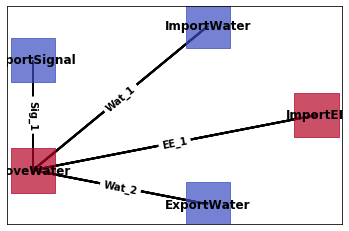

In [63]:
rp.show_graph(mdl.graph, heatmap=heatmap3)

MoveWater and ImportEE most commonly have a high number of faults in the list of scenarios. Again, we may be more interested in the expected number, however.

In [64]:
heatmap4= rp.make_expfaultsheatmap(reshists, endclasses)
rp.make_dicttable(heatmap4)

,ExportWater,ImportEE,ImportSignal,ImportWater,MoveWater
0,0.000001,0.000001,0.000001,0.000001,0.000002


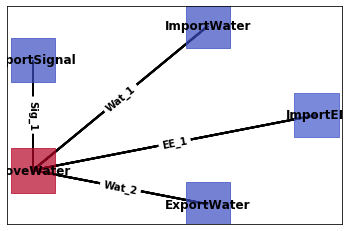

In [65]:
rp.show_graph(mdl.graph, heatmap=heatmap4)

So even though ImportEE has faults very commonly in the set of scenarios, when weighted by the occurence of scenarios, the MoveWater function has the most faults.